# The Hodgkin–Huxley model

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
V_0 = -70
n_0 = 0.3
h_0 = 0.6
m_0 = 0.05
E_Na = 45
E_K = -82
E_L = -59
g_Na = 120
g_L = 0.3
g_K = 36
C = 1


def alpha_n(v):
    return 0.01 * (-60.0 - v) / (np.exp((-60.0 - v) / 10.0) - 1.0)

def alpha_m(v):
    return (v + 45.0) / 10.0 / (1.0 - np.exp(-(v + 45.0) / 10.0))

def alpha_h(v):
    return 0.07*np.exp(-(v+70)/20)

def beta_n(v):
    return 0.125 * np.exp(-(v + 70.0) / 80.0)

def beta_m(v):
    return 4.0 * np.exp(-(v + 70.0) / 18.0)

def beta_h(v):
    return 1. / (np.exp(-(v + 40.0) / 10.0) + 1.0)


def derivative(X, t, I):
    
    v, m, n, h, = X
    dv = (I(t) - g_Na * h * m ** 3 * (v - E_Na) - g_K * n ** 4 * (v - E_K) - g_L * (v - E_L)) / C
    dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h
    
    return [dv, dm, dn, dh]

def I_step(t, t1, dt, A):
    return np.where((t>=t1)&(t<=t1+dt),A,[0])

---
### 1.

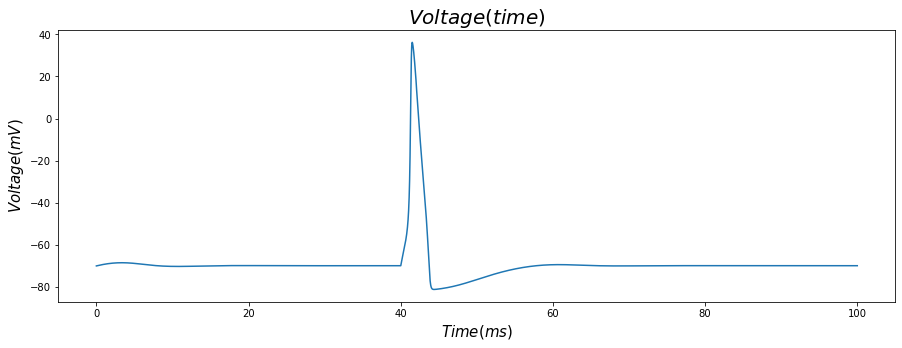

In [3]:
x0 = [V_0, m_0, n_0, h_0]
t_span = np.arange(0, 100, 0.01)
I_in = lambda t: I_step(t,t1=40,dt=2,A=20)
sol = odeint(lambda X,t: derivative(X, t, I=I_in), x0, t_span)
v = sol[:, 0]

plt.figure(figsize=(15, 5))
plt.plot(t_span, v)
plt.xlabel('$Time(ms)$', fontsize=15)
plt.ylabel('$Voltage(mV)$', fontsize=15)
plt.title('$Voltage(time)$', fontsize=20)
plt.show();

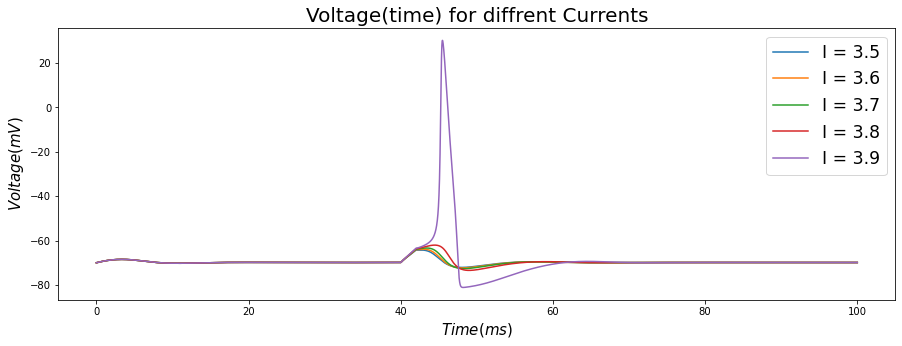

In [4]:
x0 = [V_0, m_0, n_0, h_0]
t_span = np.arange(0, 100, 0.01)

plt.figure(figsize=(15, 5))
for A in np.arange(3.5, 4, 0.1):
    I_in = lambda t: I_step(t, t1=40, dt=2, A=A)
    sol = odeint(lambda X,t: derivative(X, t, I=I_in), x0, t_span)
    v = sol[:, 0]
    plt.plot(t_span, v, label='I = %.1f'%A)
    plt.xlabel('$Time(ms)$', fontsize=15)
    plt.ylabel('$Voltage(mV)$', fontsize=15)
    plt.title('Voltage(time) for diffrent Currents', fontsize=20)
    plt.legend(fontsize='xx-large')


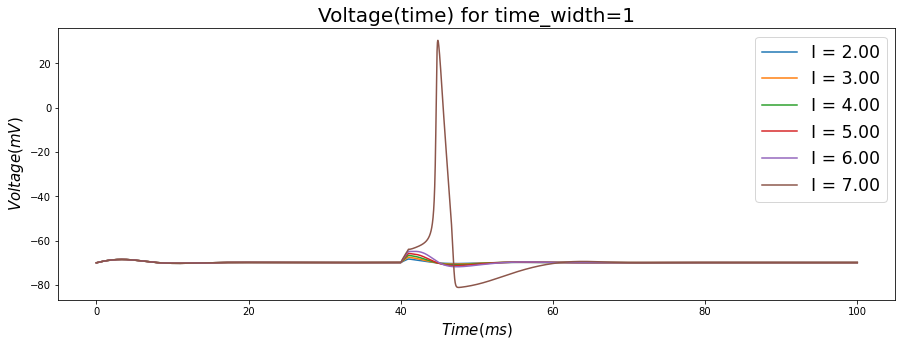

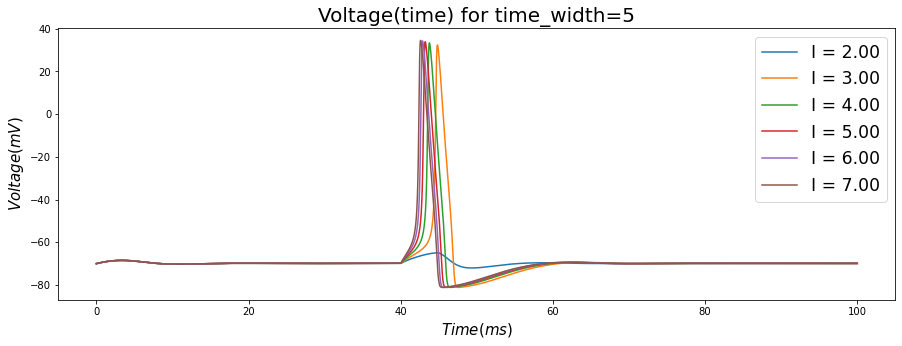

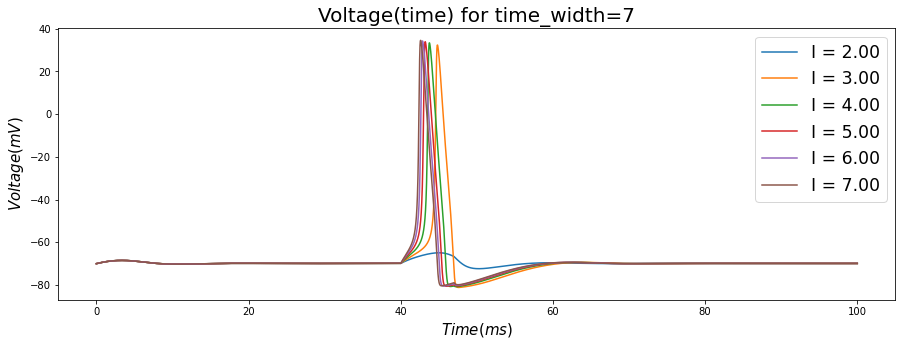

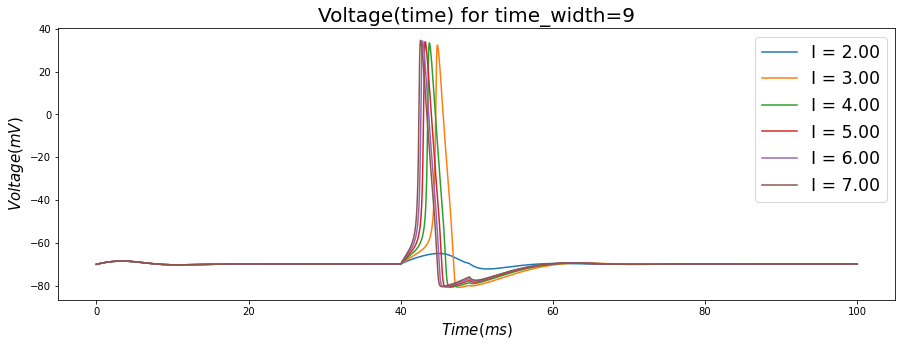

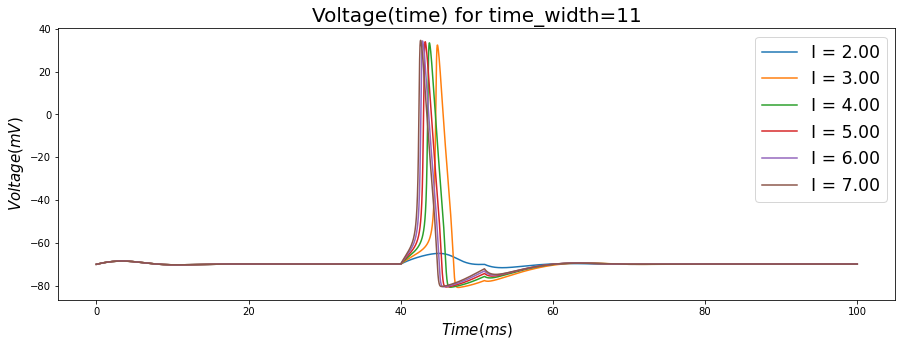

In [5]:
x0 = [V_0, m_0, n_0, h_0]
t_span = np.arange(0, 100, 0.01)

for dt in [1, 5, 7, 9, 11]:
    plt.figure(figsize=(15, 5))
    for A in np.arange(2, 8, 1):
        I_in = lambda t: I_step(t, t1=40, dt=dt, A=A)
        sol = odeint(lambda X,t: derivative(X, t, I=I_in), x0, t_span)
        v = sol[:, 0]
        plt.plot(t_span, v, label='I = %.2f'%(A))
        plt.xlabel('$Time(ms)$', fontsize=15)
        plt.ylabel('$Voltage(mV)$', fontsize=15)
        plt.legend(fontsize='xx-large')
        plt.title('Voltage(time) for time_width=%d'%dt, fontsize=20)


---
### 2.

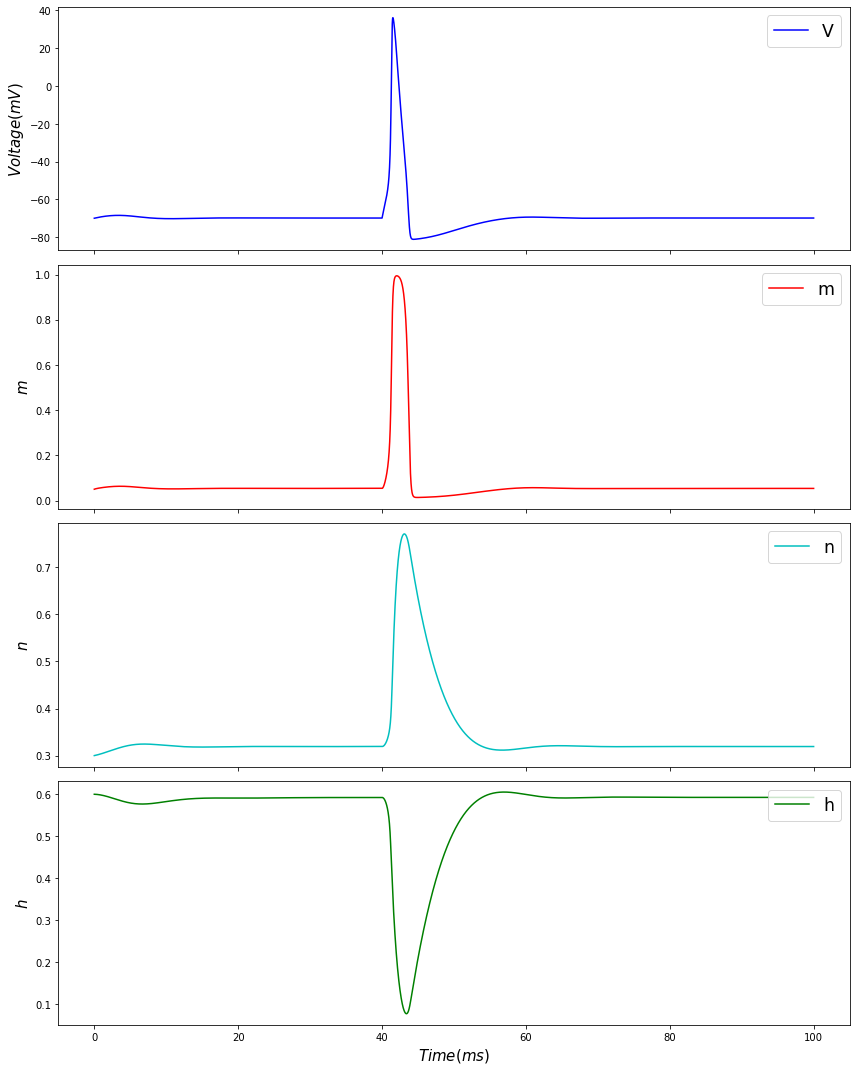

In [6]:
x0 = [V_0, m_0, n_0, h_0]
t_span = np.arange(0, 100, 0.01)
I_in = lambda t: I_step(t,t1=40,dt=2,A=20)
sol = odeint(lambda X,t: derivative(X, t, I=I_in), x0, t_span)
v = sol[:, 0]
m = sol[:, 1]
n = sol[:, 2]
h = sol[:, 3]

plt.subplots(4,1, figsize=(12, 15), sharex=True)
plt.subplot(411)
plt.plot(t_span, v, 'b', label='V')
plt.ylabel('$Voltage(mV)$', fontsize=15)
plt.legend(fontsize='xx-large', loc=1)
plt.subplot(412)
plt.plot(t_span, m, 'r', label='m')
plt.ylabel('$m$', fontsize=15)
plt.legend(fontsize='xx-large', loc=1)
plt.subplot(413)
plt.plot(t_span, n, 'c', label='n')
plt.ylabel('$n$', fontsize=15)
plt.legend(fontsize='xx-large', loc=1)
plt.subplot(414)
plt.plot(t_span, h, 'g', label='h')
plt.ylabel('$h$', fontsize=15)
plt.xlabel('$Time(ms)$', fontsize=15)
plt.legend(fontsize='xx-large', loc=1)
plt.tight_layout()
plt.show()

---
### 3.

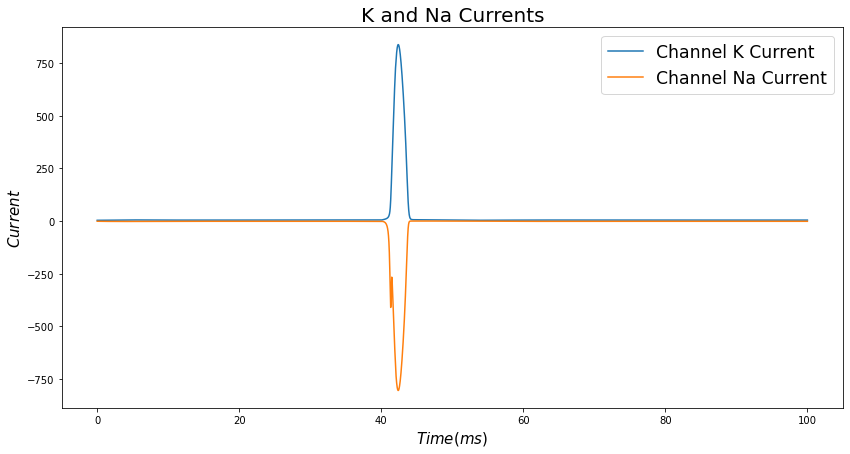

In [7]:
current_K = g_K * n ** 4 * (v - E_K)
current_Na = g_Na * m ** 3 * h * (v - E_Na)

plt.figure(figsize=(14,7))
plt.plot(t_span, current_K, label='Channel K Current')
plt.plot(t_span, current_Na, label='Channel Na Current')
plt.xlabel('$Time(ms)$', fontsize=15)
plt.ylabel('$Current$', fontsize=15)
plt.title('K and Na Currents', fontsize=20)
plt.legend(fontsize='xx-large')
plt.show();

---
### 4.

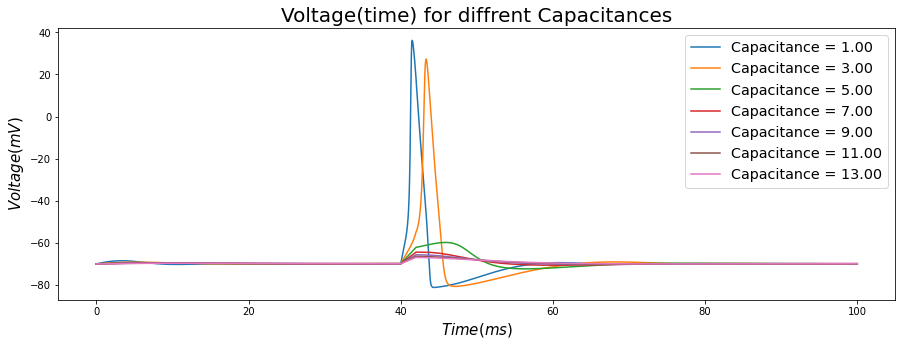

In [8]:
x0 = [V_0, m_0, n_0, h_0]
t_span = np.arange(0, 100, 0.01)
I_in = lambda t: I_step(t,t1=40,dt=2,A=20)
plt.figure(figsize=(15, 5))

for C in np.arange(1, 14, 2):
    sol = odeint(lambda X,t: derivative(X, t, I=I_in), x0, t_span)
    v = sol[:, 0]
    plt.plot(t_span, v, label='Capacitance = %.2f'%C)
    plt.xlabel('$Time(ms)$', fontsize=15)
    plt.ylabel('$Voltage(mV)$', fontsize=15)
    plt.title('Voltage(time) for diffrent Capacitances', fontsize=20)
    plt.legend(fontsize='x-large')
plt.show();

---
### 5.

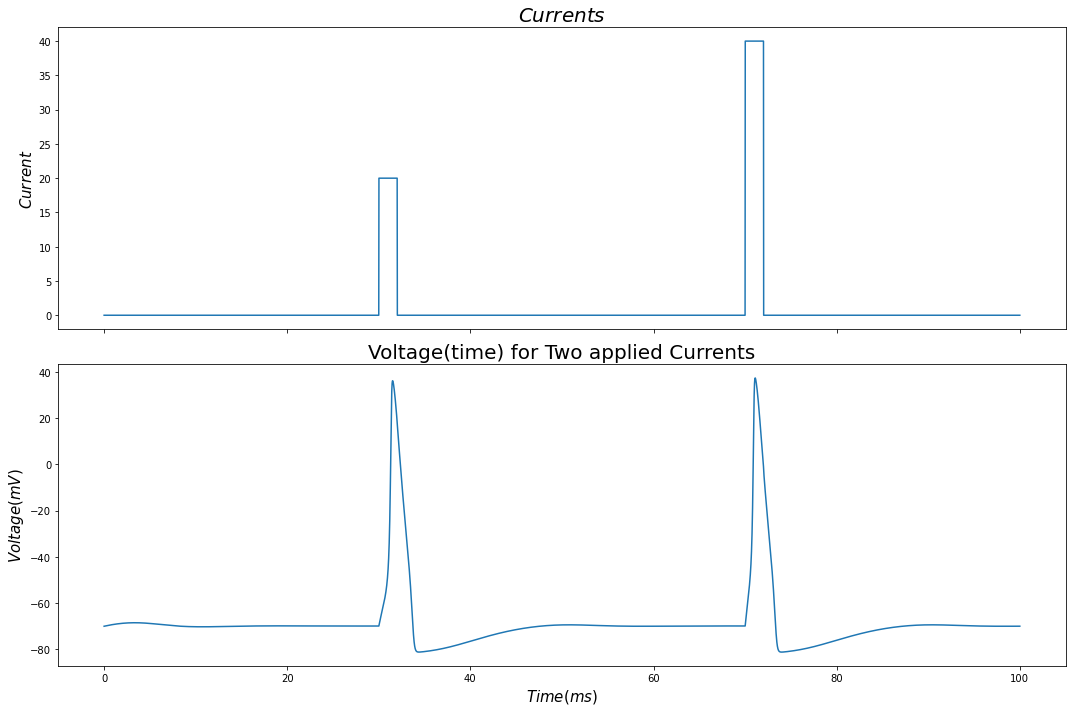

In [9]:
def I_step_2(t, t1, dt, A):
    op1 = np.where((t>=t1)&(t<=t1+dt),A,[0])
    op2 = np.where((t>=t1+40)&(t<=t1+40+dt),2*A,[0])
    return np.add(op1, op2)

C = 1
x0 = [V_0, m_0, n_0, h_0]
t_span = np.arange(0, 100, 0.01)
I_in = lambda t: I_step_2(t,t1=30,dt=2,A=20)
sol = odeint(lambda X,t: derivative(X, t, I=I_in), x0, t_span)
v = sol[:, 0]

plt.subplots(2,1, figsize=(15, 10), sharex=True)
plt.subplot(211)
plt.plot(t_span, I_step_2(t_span,t1=30,dt=2,A=20))
plt.ylabel('$Current$', fontsize=15)
plt.title('$Currents$', fontsize=20)
plt.subplot(212)
plt.plot(t_span, v)
plt.xlabel('$Time(ms)$', fontsize=15)
plt.ylabel('$Voltage(mV)$', fontsize=15)
plt.title('Voltage(time) for Two applied Currents', fontsize=20)
plt.tight_layout()
plt.show();

---
<div align=center><font  size="4" color='grey'>end</font></div>

---